# Copyright

<PRE>
Copyright (c) 2022 Bálint Gyires-Tóth - All Rights Reserved
You may use and modify this code for research and development purpuses.
Use this code for educational purposes (self-paced or instructor led) without the permission of the author is prohibited.
</PRE>

Using Conv2d layers
Will use from tensorflow.keras.layers import Conv24, MaxPool2d



# California housing prices - modeling
In this notebook we will: 
* using California housing prices data (https://www.kaggle.com/camnugent/california-housing-prices)
* exploring the data
* creating a model
* training the model
* evaluation on test data
* making predictions and regression plot

Assigment: 
* please complete TODO parts


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.datasets import fetch_california_housing

In [2]:
# <TODO> Keras imports : model, layers, optimizers
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense

In [3]:
# load California Housing Prices dataset
housing = fetch_california_housing()
X,Y = housing['data'], housing['target']
nb_samples = X.shape[0]

Splitting data into training, validation and test sets:

In [4]:
valid_split = 0.2
test_split  = 0.1

v_point = int(X.shape[0]*(1-valid_split-test_split))
t_point = int(X.shape[0]*(1-test_split))

X_train = X[0:v_point]
Y_train = Y[0:v_point]
X_valid = X[v_point:t_point]
Y_valid = Y[v_point:t_point]
X_test  = X[t_point:]
Y_test  = Y[t_point:]

Standardization of the data:

In [5]:
scaler  = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test  = scaler.transform(X_test)

Defining the model (with one or two hidden layers and 8-64 neurons / layer, the input and output layers' sizes are defined by the data):

In [6]:
model = Sequential()

# <TODO> # model.add(....)

model.add(Dense(X.shape[1], activation='relu', input_dim =(X_train.shape[1])))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, kernel_initializer='normal', activation='relu'))
model.add(Dense(1,kernel_initializer='normal', activation = 'relu'))

Inspect the model summary:

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 32)                288       
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 633
Trainable params: 633
Non-trainable params: 0
_________________________________________________________________


Number of trainable parameters in the model: TODO

Compiling the model:

In [8]:
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

Defining the earlystopping callback function:

In [9]:
es = EarlyStopping(patience=3, restore_best_weights=True)

Train the model, use training and validation data and apply early stopping:

In [10]:
model.fit(X_train, Y_train, batch_size=10, 
                            epochs=10, verbose=1, validation_split=valid_split, 
                            callbacks=[es])

Epoch 1/10
1156/1156 [==============================] - 5s 4ms/step - loss: 1.0138 - mse: 1.0138 - mae: 0.6971 - val_loss: 0.5124 - val_mse: 0.5124 - val_mae: 0.5833
Epoch 2/10
1156/1156 [==============================] - 4s 4ms/step - loss: 0.4406 - mse: 0.4406 - mae: 0.4758 - val_loss: 0.3479 - val_mse: 0.3479 - val_mae: 0.4303
Epoch 3/10
1156/1156 [==============================] - 4s 4ms/step - loss: 0.4058 - mse: 0.4058 - mae: 0.4553 - val_loss: 0.3314 - val_mse: 0.3314 - val_mae: 0.4090
Epoch 4/10
1156/1156 [==============================] - 5s 4ms/step - loss: 0.3907 - mse: 0.3907 - mae: 0.4485 - val_loss: 0.3086 - val_mse: 0.3086 - val_mae: 0.3827
Epoch 5/10
1156/1156 [==============================] - 5s 5ms/step - loss: 0.3830 - mse: 0.3830 - mae: 0.4432 - val_loss: 0.3843 - val_mse: 0.3843 - val_mae: 0.4465
Epoch 6/10
1156/1156 [==============================] - 3s 2ms/step - loss: 0.3785 - mse: 0.3785 - mae: 0.4393 - val_loss: 0.3330 - val_mse: 0.3330 - val_mae: 0.3925
Epoc

Evaluate on the test data:

In [11]:
model.evaluate(X_test, Y_test)

65/65 [==============================] - 0s 2ms/step - loss: 0.2535 - mse: 0.2535 - mae: 0.3529


[0.2534647583961487, 0.2534647583961487, 0.3528852164745331]

Make predictions:

In [12]:
preds = model.predict(X_test)

Inspecting the result on a regression plot:

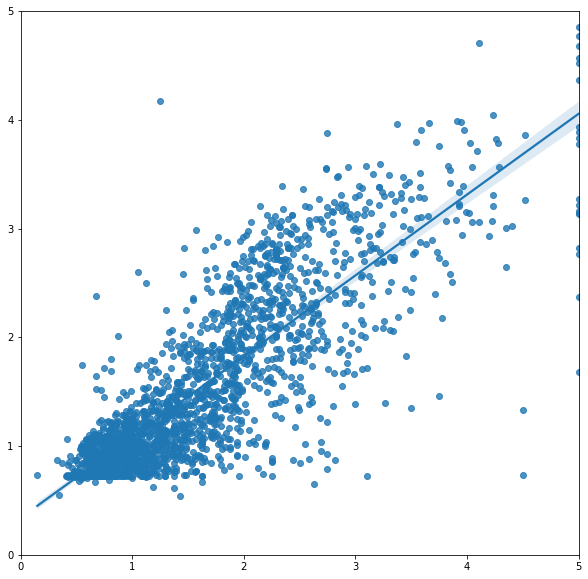

In [13]:
plt.figure(figsize=(10,10))
sns.regplot(x=Y_test.reshape(-1), y=preds.reshape(-1)).set(xlim=(0,5),ylim=(0,5)); 